<a href="https://colab.research.google.com/github/RafaelTorresCH/Signal-theory/blob/main/class%20notebooks%20/week_nov(3-7)/NOV_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

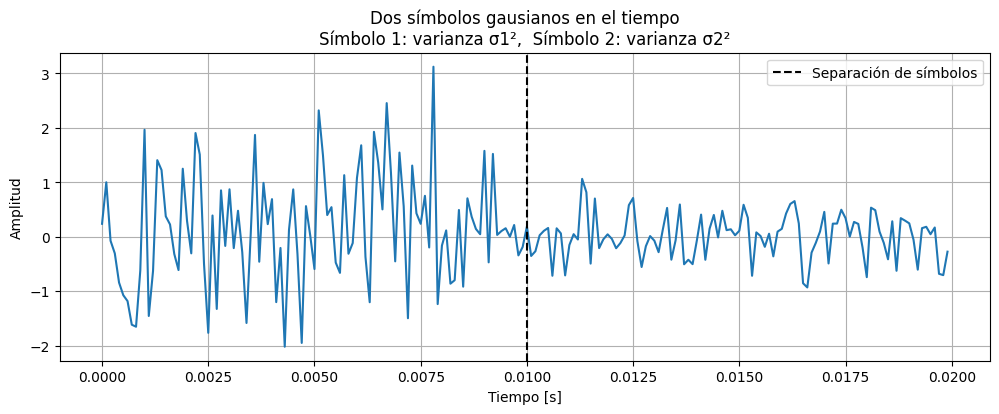

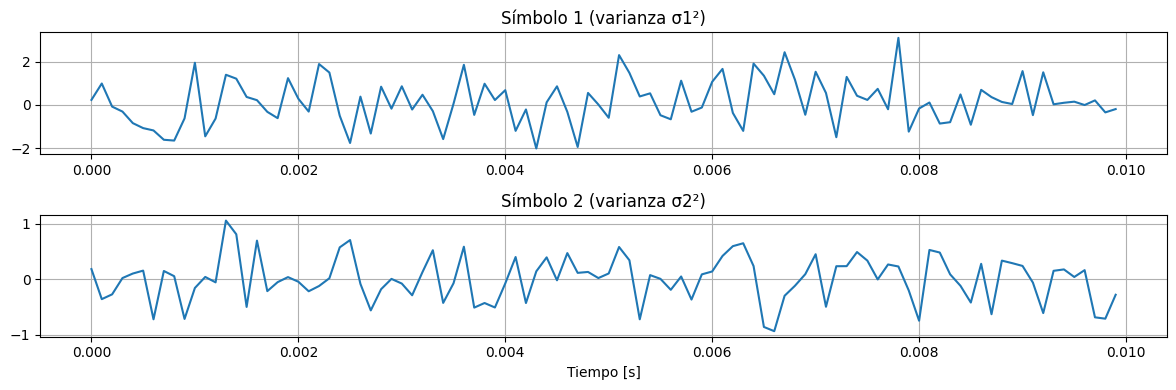

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# Parámetros básicos
# ==========================
fs = 10000          # frecuencia de muestreo [Hz]
T_sym = 0.01        # duración de cada símbolo [s]
N = int(T_sym * fs) # muestras por símbolo

# Símbolos: v1 y v2 (constantes)
v1 = 1.0   # por ejemplo
v2 = 0.2   # por ejemplo

# Definimos sigma(v) a tu gusto.
# Aquí: sigma(v) = sqrt(v) solo como ejemplo.
sigma1 = np.sqrt(v1)
sigma2 = np.sqrt(v2)

# ==========================
# Generación de los dos símbolos
# ==========================
# Símbolo 1: N(0, sigma1^2)
s1 = np.random.normal(loc=0.0, scale=sigma1, size=N)

# Símbolo 2: N(0, sigma2^2)
s2 = np.random.normal(loc=0.0, scale=sigma2, size=N)

# Concatenamos los dos símbolos en el tiempo
x = np.concatenate([s1, s2])

# Eje de tiempo total
t_total = np.arange(0, 2*T_sym, 1/fs)

# ==========================
# Oscilograma
# ==========================
plt.figure(figsize=(12,4))
plt.plot(t_total, x)
plt.axvline(T_sym, color='k', linestyle='--', label='Separación de símbolos')
plt.title("Dos símbolos gausianos en el tiempo\nSímbolo 1: varianza σ1²,  Símbolo 2: varianza σ2²")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# (Opcional) ver cada símbolo por separado
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(np.arange(0, T_sym, 1/fs), s1)
plt.title("Símbolo 1 (varianza σ1²)")
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(np.arange(0, T_sym, 1/fs), s2)
plt.title("Símbolo 2 (varianza σ2²)")
plt.xlabel("Tiempo [s]")
plt.grid(True)

plt.tight_layout()
plt.show()


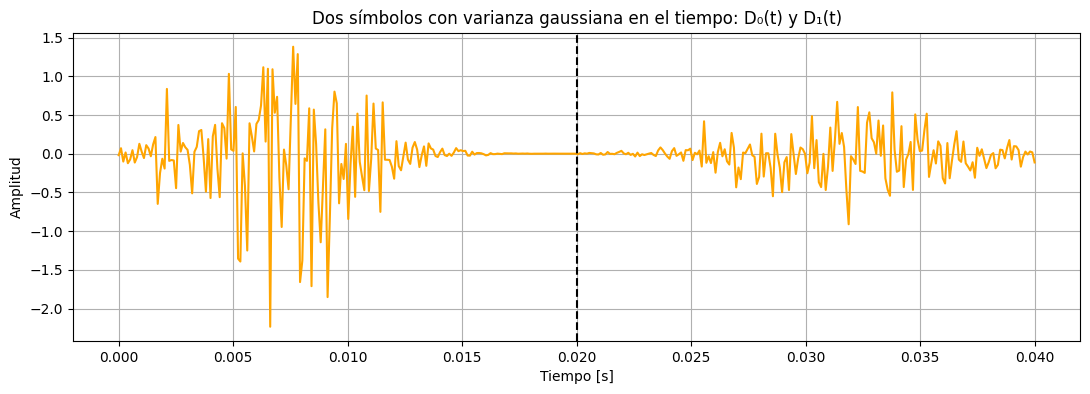

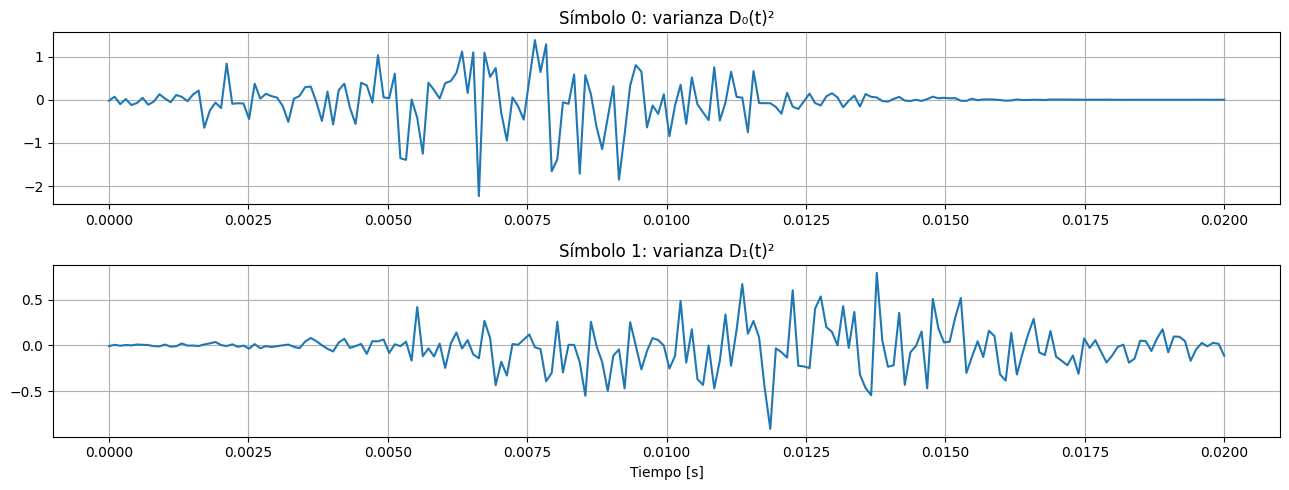

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# Parámetros de los símbolos
# ============================================
fs = 10000        # frecuencia de muestreo
T_sym = 0.02      # duración de cada símbolo (20 ms)
N = int(T_sym * fs)
t = np.linspace(0, T_sym, N)

# ============================================
# Definir las envolventes de varianza D0(t) y D1(t)
# (Puedes ajustar amplitud, centros y anchuras)
# ============================================

# Símbolo 0
A0 = 1.0
mu0 = 0.007
s0  = 0.003
D0 = A0 * np.exp(- (t - mu0)**2 / (2*s0**2))

# Símbolo 1
A1 = 0.4
mu1 = 0.012
s1  = 0.004
D1 = A1 * np.exp(- (t - mu1)**2 / (2*s1**2))

# ============================================
# Generar ruido gaussiano con varianza D_i(t)^2
# ============================================
symbol0 = np.random.normal(0, D0)
symbol1 = np.random.normal(0, D1)

# Concatenar los símbolos
x = np.concatenate([symbol0, symbol1])
t_total = np.linspace(0, 2*T_sym, 2*N)

# ============================================
# Graficar oscilograma
# ============================================
plt.figure(figsize=(13,4))
plt.plot(t_total, x, color='orange')
plt.axvline(T_sym, color='black', linestyle='--')
plt.title("Dos símbolos con varianza gaussiana en el tiempo: D₀(t) y D₁(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# ============================================
# Mostrar cada símbolo por separado
# ============================================
plt.figure(figsize=(13,5))

plt.subplot(2,1,1)
plt.plot(t, symbol0)
plt.title("Símbolo 0: varianza D₀(t)²")
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, symbol1)
plt.title("Símbolo 1: varianza D₁(t)²")
plt.xlabel("Tiempo [s]")
plt.grid()

plt.tight_layout()
plt.show()


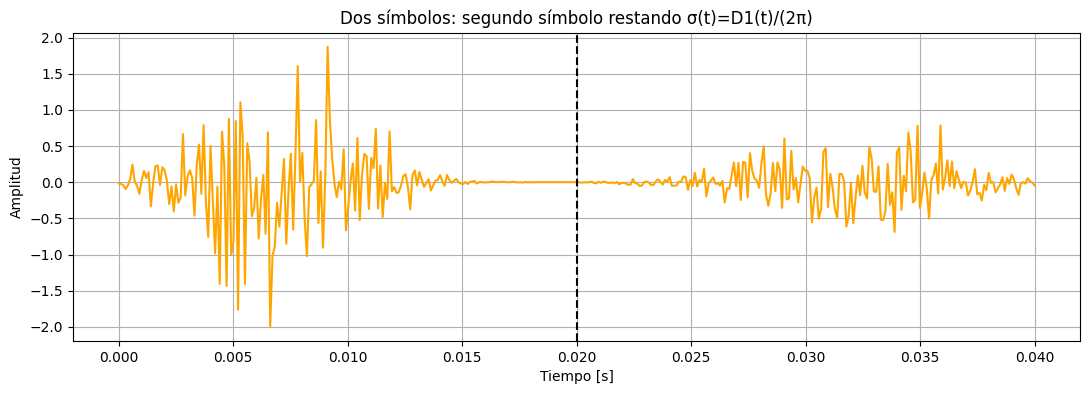

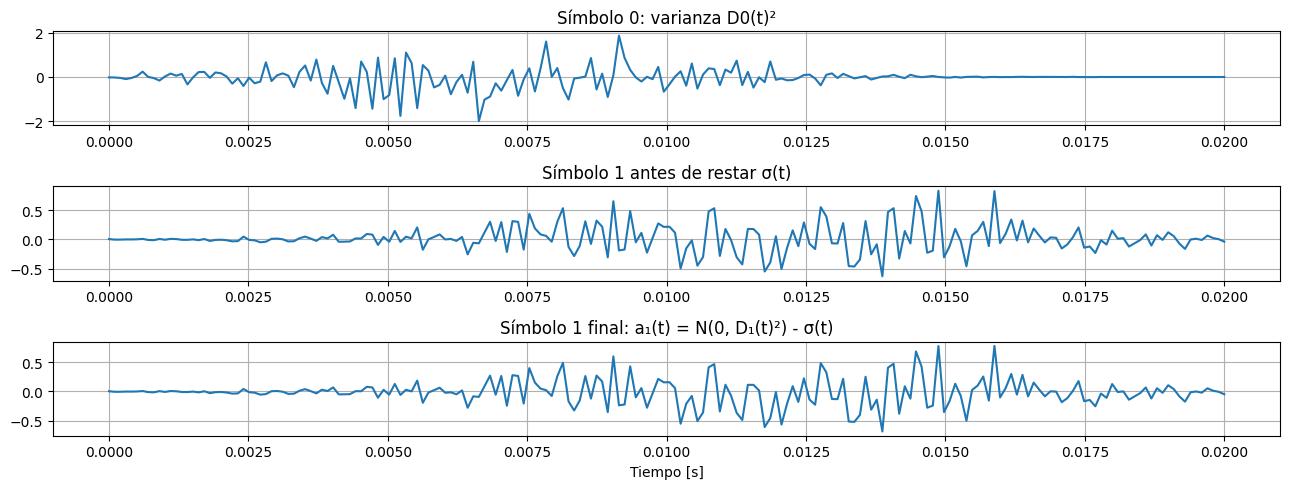

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# Parámetros
# ============================================
fs = 10000
T_sym = 0.02
N = int(T_sym * fs)
t = np.linspace(0, T_sym, N)

# ============================================
# Definir D0(t) y D1(t)
# (ajusta A0, A1, mu0, mu1, s0, s1 según tu modelo)
# ============================================

A0 = 1.0
mu0 = 0.007
s0  = 0.003
D0 = A0 * np.exp(- (t - mu0)**2 / (2*s0**2))

A1 = 0.4
mu1 = 0.012
s1  = 0.004
D1 = A1 * np.exp(- (t - mu1)**2 / (2*s1**2))

# ============================================
# Generar los símbolos
# ============================================

# Símbolo 0: ruido con varianza D0(t)^2
symbol0 = np.random.normal(0, D0)

# Símbolo 1: ruido con varianza D1(t)^2
symbol1_raw = np.random.normal(0, D1)

# ============================================
# Cálculo de sigma(t) = (1/(2*pi)) * D1(t)
# y resta al símbolo 1
# ============================================
sigma = (1 / (2 * np.pi)) * D1
symbol1 = symbol1_raw - sigma

# ============================================
# Señal completa
# ============================================
x = np.concatenate([symbol0, symbol1])
t_total = np.linspace(0, 2*T_sym, 2*N)

# ============================================
# Graficar oscilograma
# ============================================
plt.figure(figsize=(13,4))
plt.plot(t_total, x, color='orange')
plt.axvline(T_sym, color='black', linestyle='--')
plt.title("Dos símbolos: segundo símbolo restando σ(t)=D1(t)/(2π)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

# ============================================
# Mostrar símbolos por separado
# ============================================
plt.figure(figsize=(13,5))

plt.subplot(3,1,1)
plt.plot(t, symbol0)
plt.title("Símbolo 0: varianza D0(t)²")
plt.grid()

plt.subplot(3,1,2)
plt.plot(t, symbol1_raw)
plt.title("Símbolo 1 antes de restar σ(t)")
plt.grid()

plt.subplot(3,1,3)
plt.plot(t, symbol1)
plt.title("Símbolo 1 final: a₁(t) = N(0, D₁(t)²) - σ(t)")
plt.xlabel("Tiempo [s]")
plt.grid()

plt.tight_layout()
plt.show()


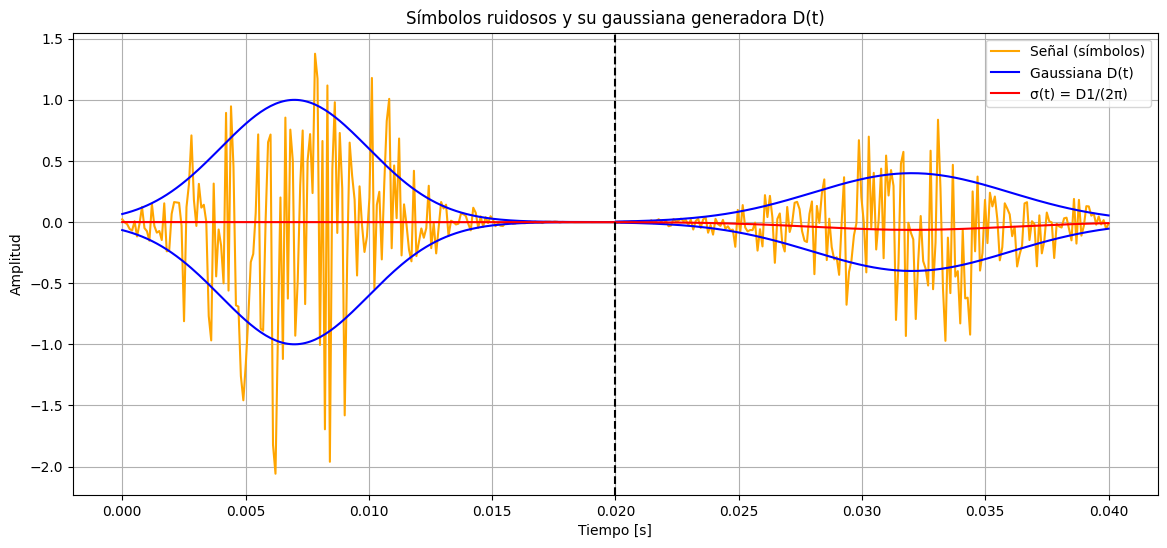

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# Parámetros
# ============================================
fs = 10000
T_sym = 0.02
N = int(T_sym * fs)
t = np.linspace(0, T_sym, N)

# ============================================
# Definir D0(t) y D1(t)
# ============================================
A0 = 1.0
mu0 = 0.007
s0  = 0.003
D0 = A0 * np.exp(- (t - mu0)**2 / (2*s0**2))

A1 = 0.4
mu1 = 0.012
s1  = 0.004
D1 = A1 * np.exp(- (t - mu1)**2 / (2*s1**2))

# ============================================
# Generar símbolos
# ============================================
symbol0 = np.random.normal(0, D0)
symbol1_raw = np.random.normal(0, D1)

# sigma(t) = D1(t)/(2*pi)
sigma = D1 / (2 * np.pi)

# Símbolo 1 final
symbol1 = symbol1_raw - sigma

# Señal completa
x = np.concatenate([symbol0, symbol1])
t_total = np.linspace(0, 2*T_sym, 2*N)

# Gaussiana completa para graficar arriba
D_total = np.concatenate([D0, D1])

# ============================================
# Graficar todo
# ============================================
plt.figure(figsize=(14,6))

# Señal ruidosa (símbolos)
plt.plot(t_total, x, label="Señal (símbolos)", color='orange')

# Dibujar gaussiana encima
plt.plot(t_total, D_total, label="Gaussiana D(t)", color='blue')
plt.plot(t_total, -D_total, color='blue')  # negativo para ver el envelope

# Dibujar sigma(t) sobre el segundo símbolo
sigma_total = np.concatenate([np.zeros_like(D0), sigma])
plt.plot(t_total, -sigma_total, label="σ(t) = D1/(2π)", color='red')

# Línea de separación
plt.axvline(T_sym, linestyle='--', color='black')

plt.title("Símbolos ruidosos y su gaussiana generadora D(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


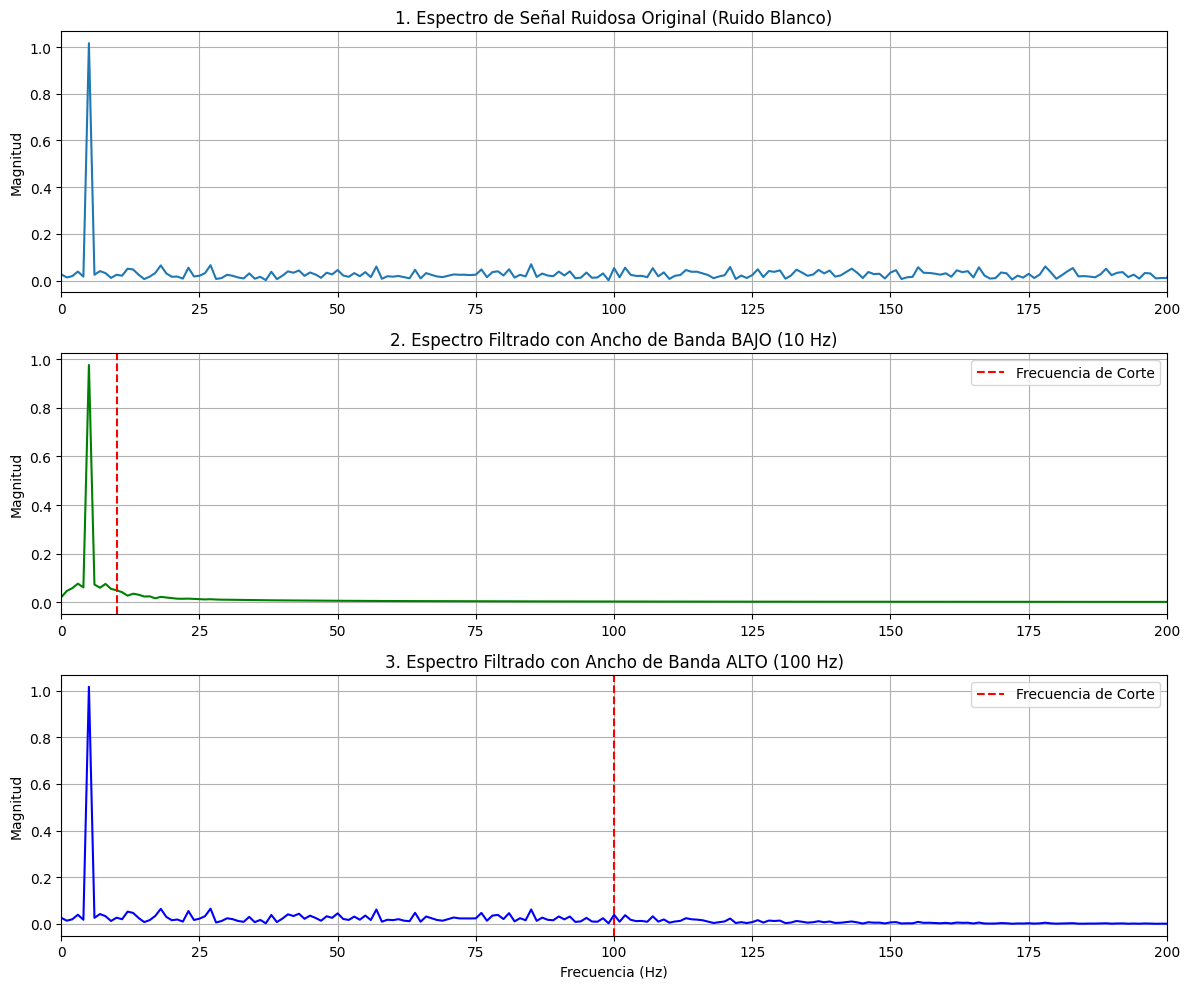

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# --- Datos de la simulación anterior ---
fs = 1000  # Frecuencia de muestreo (Hz).
t = np.arange(0, 1, 1/fs)  # Vector de tiempo.
f_señal = 5  # Frecuencia de la señal (Hz).
f_corte_bajo = 10  # Ancho de Banda BAJO
f_corte_alto = 100 # Ancho de Banda ALTO

# Señal Ruidosa Original (asumimos que ya fue generada)
# Solo para asegurar la ejecución independiente, generamos de nuevo la señal:
señal_pura = np.sin(2 * np.pi * f_señal * t)
ruido = np.random.normal(0, 0.5, len(t))
señal_ruidosa = señal_pura + ruido

# Coeficientes de filtrado y filtrado (asumimos que ya fueron calculados)
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

b_bajo, a_bajo = butter_lowpass(f_corte_bajo, fs, order=4)
señal_filtrada_bajo = lfilter(b_bajo, a_bajo, señal_ruidosa)

b_alto, a_alto = butter_lowpass(f_corte_alto, fs, order=4)
señal_filtrada_alto = lfilter(b_alto, a_alto, señal_ruidosa)

# --- FUNCIÓN PARA CALCULAR EL ESPECTRO (FFT) ---
def calcular_espectro(señal, fs):
    """Calcula la magnitud del espectro de Fourier de una señal."""
    N = len(señal)
    # 1. Aplicar la FFT
    Y = np.fft.fft(señal)
    # 2. Calcular la magnitud (para el espectro unilateral)
    # np.abs(Y[:N//2]) -> toma solo la mitad positiva del espectro
    magnitud = 2.0 / N * np.abs(Y[:N//2])
    # 3. Generar el vector de frecuencias
    frecuencias = np.fft.fftfreq(N, 1/fs)[:N//2]
    return frecuencias, magnitud

# Calcular los espectros
f_ruidosa, m_ruidosa = calcular_espectro(señal_ruidosa, fs)
f_bajo, m_bajo = calcular_espectro(señal_filtrada_bajo, fs)
f_alto, m_alto = calcular_espectro(señal_filtrada_alto, fs)

# --- 4. Visualización de los Espectros ---

plt.figure(figsize=(12, 10))

# Espectro de la Señal Ruidosa Original
plt.subplot(3, 1, 1)
plt.plot(f_ruidosa, m_ruidosa)
plt.title('1. Espectro de Señal Ruidosa Original (Ruido Blanco)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 200) # Enfocar el rango de bajas frecuencias

# Espectro del Filtrado con Ancho de Banda BAJO (10 Hz)
plt.subplot(3, 1, 2)
plt.plot(f_bajo, m_bajo, color='green')
plt.title(f'2. Espectro Filtrado con Ancho de Banda BAJO ({f_corte_bajo} Hz)')
plt.ylabel('Magnitud')
plt.axvline(x=f_corte_bajo, color='r', linestyle='--', label='Frecuencia de Corte')
plt.legend()
plt.grid(True)
plt.xlim(0, 200)

# Espectro del Filtrado con Ancho de Banda ALTO (100 Hz)
plt.subplot(3, 1, 3)
plt.plot(f_alto, m_alto, color='blue')
plt.title(f'3. Espectro Filtrado con Ancho de Banda ALTO ({f_corte_alto} Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.axvline(x=f_corte_alto, color='r', linestyle='--', label='Frecuencia de Corte')
plt.legend()
plt.grid(True)
plt.xlim(0, 200)

plt.tight_layout()
plt.show()

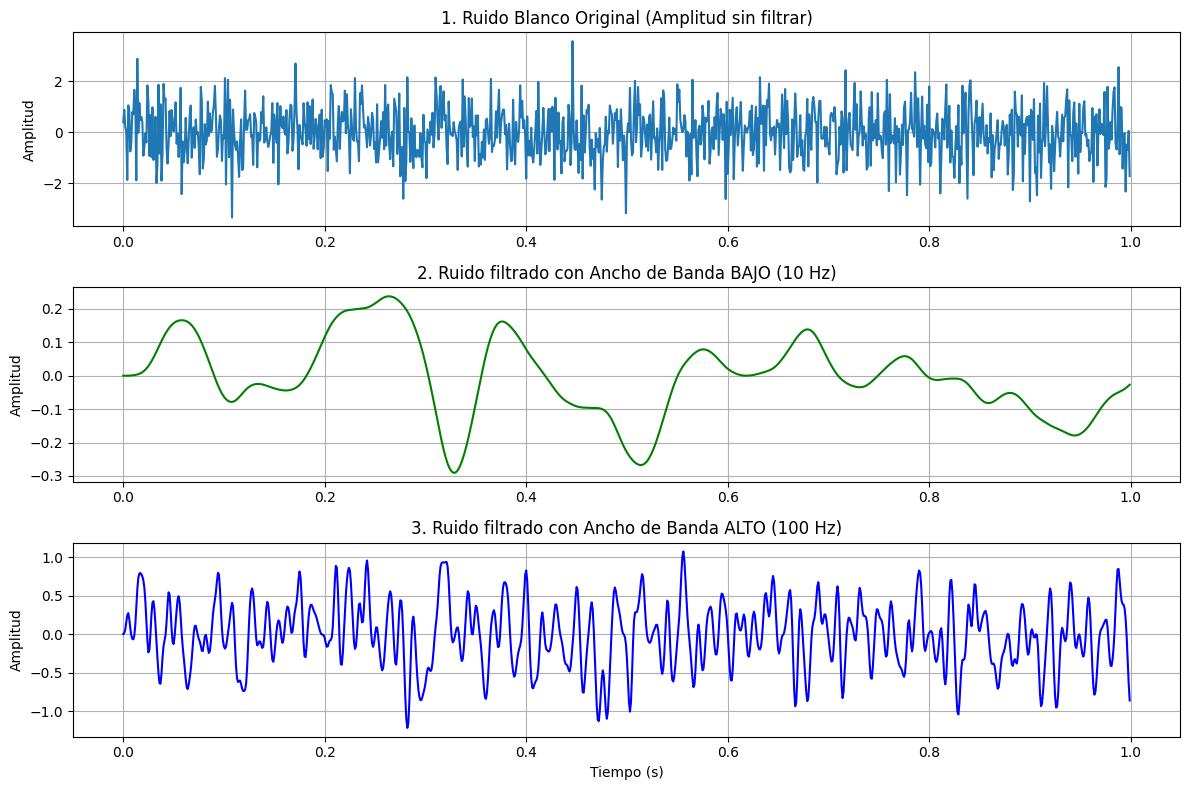

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# --- 1. Definición de Parámetros ---
fs = 1000  # Frecuencia de muestreo (Hz).
t = np.arange(0, 1, 1/fs)  # Vector de tiempo (1 segundo).

# Generación de Ruido Blanco Gaussiano
ruido_base = np.random.normal(0, 1, len(t)) # Amplitud de 1 para mejor visualización

# --- 2. Diseño de Filtros ---

def butter_lowpass(cutoff, fs, order=5):
    """Diseña un filtro Butterworth de paso bajo."""
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# --- Ancho de Banda BAJO ---
f_corte_bajo = 10  # 10 Hz
b_bajo, a_bajo = butter_lowpass(f_corte_bajo, fs, order=4)
ruido_filtrado_bajo = lfilter(b_bajo, a_bajo, ruido_base)

# --- Ancho de Banda ALTO ---
f_corte_alto = 100  # 100 Hz
b_alto, a_alto = butter_lowpass(f_corte_alto, fs, order=4)
ruido_filtrado_alto = lfilter(b_alto, a_alto, ruido_base)

# --- 3. Visualización de Resultados ---

plt.figure(figsize=(12, 8))

# Ruido Blanco Original
plt.subplot(3, 1, 1)
plt.plot(t, ruido_base)
plt.title('1. Ruido Blanco Original (Amplitud sin filtrar)')
plt.ylabel('Amplitud')
plt.grid(True)

# Primer Caso: Ancho de Banda BAJO (10 Hz)
plt.subplot(3, 1, 2)
plt.plot(t, ruido_filtrado_bajo, color='green')
plt.title(f'2. Ruido filtrado con Ancho de Banda BAJO ({f_corte_bajo} Hz)')
plt.ylabel('Amplitud')
plt.grid(True)

# Segundo Caso: Ancho de Banda ALTO (100 Hz)
plt.subplot(3, 1, 3)
plt.plot(t, ruido_filtrado_alto, color='blue')
plt.title(f'3. Ruido filtrado con Ancho de Banda ALTO ({f_corte_alto} Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

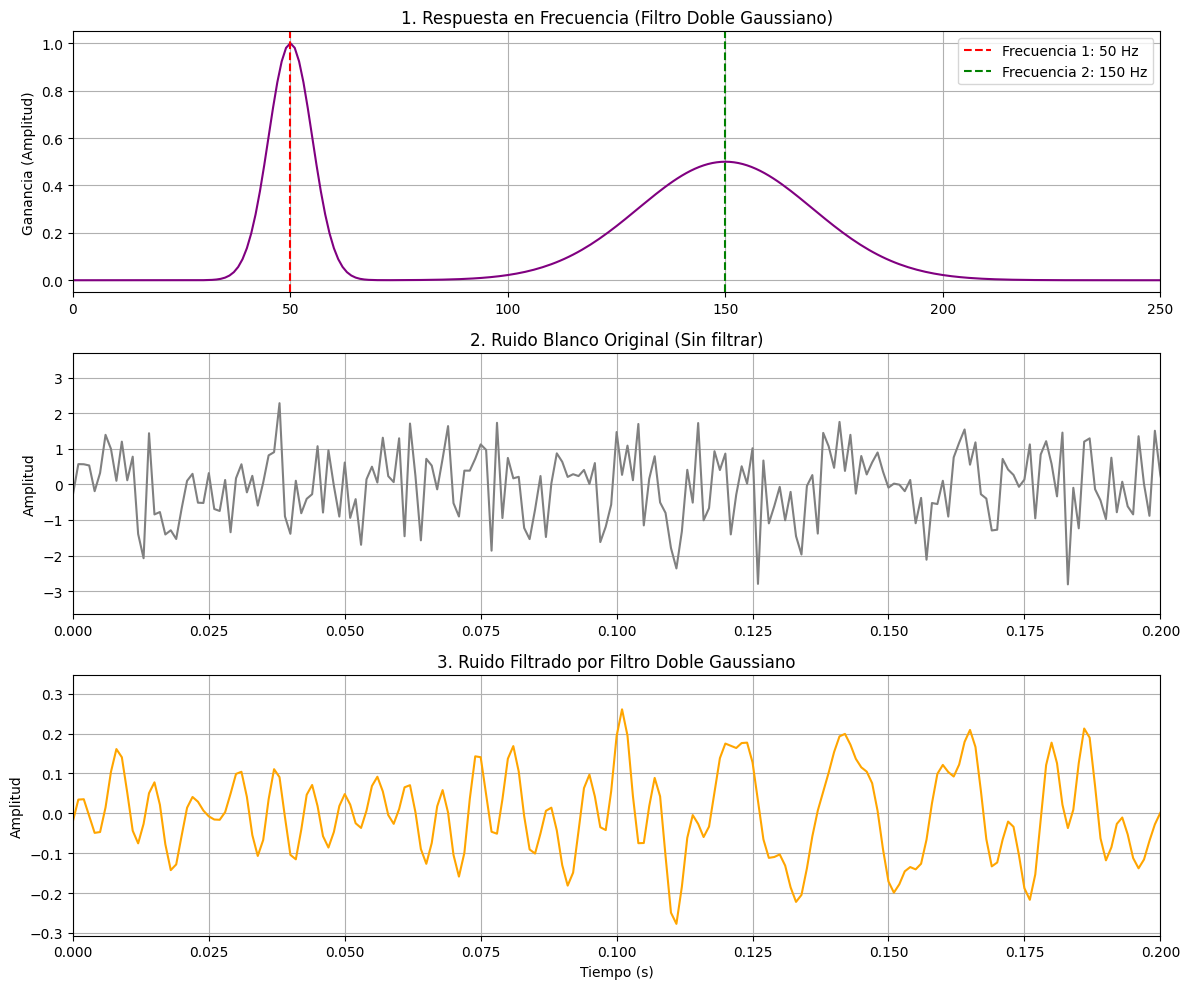

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Parámetros y Ruido Base ---
fs = 1000  # Frecuencia de muestreo (Hz).
N = fs     # Número de muestras (1 segundo).
t = np.arange(0, 1, 1/fs)
frecuencias = np.fft.fftfreq(N, 1/fs) # Vector de frecuencias

ruido_base = np.random.normal(0, 1, N) # Ruido Blanco (Potencia uniforme en el espectro)
Y_ruido_base = np.fft.fft(ruido_base)  # Espectro del Ruido Blanco

# --- 2. Definición del Filtro de Doble Gaussiana ---

# Parámetros de la primera Gaussiana (Pico más estrecho y alto)
A1 = 1.0  # Altura (Ganancia)
f1 = 50   # Frecuencia central (Hz)
sigma1 = 5 # Ancho de banda (Menor ancho -> Más selectivo)

# Parámetros de la segunda Gaussiana (Pico más ancho y bajo)
A2 = 0.5  # Altura (Ganancia)
f2 = 150  # Frecuencia central (Hz)
sigma2 = 20 # Ancho de banda (Mayor ancho -> Menos selectivo)

# Función Gaussiana en el dominio de la frecuencia
def gaussian_filter(f, A, f_c, sigma):
    return A * np.exp(-((f - f_c)**2) / (2 * sigma**2))

# Función de Transferencia (Doble Gaussiana)
H_doble_gauss = (
    gaussian_filter(frecuencias, A1, f1, sigma1) +
    gaussian_filter(frecuencias, A2, f2, sigma2)
)

# --- 3. Filtrado y Transformada Inversa (IFFT) ---

# Aplicar el filtro: Multiplicar el espectro del ruido por el filtro
Y_ruido_filtrado = Y_ruido_base * H_doble_gauss

# Transformada Inversa para obtener la señal filtrada en el tiempo
ruido_filtrado_doble_gauss = np.fft.ifft(Y_ruido_filtrado).real

# --- 4. Visualización ---
fig, axs = plt.subplots(3, 1, figsize=(12, 10))

# 4a. Dominio de la Frecuencia (Filtro)
axs[0].plot(frecuencias[:N//2], H_doble_gauss[:N//2], color='purple')
axs[0].set_title('1. Respuesta en Frecuencia (Filtro Doble Gaussiano)')
axs[0].set_ylabel('Ganancia (Amplitud)')
axs[0].axvline(x=f1, color='r', linestyle='--', label=f'Frecuencia 1: {f1} Hz')
axs[0].axvline(x=f2, color='g', linestyle='--', label=f'Frecuencia 2: {f2} Hz')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim(0, 250)

# 4b. Dominio del Tiempo (Ruido Original)
axs[1].plot(t, ruido_base, color='gray')
axs[1].set_title('2. Ruido Blanco Original (Sin filtrar)')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)
axs[1].set_xlim(0, 0.2) # Zoom para ver el detalle

# 4c. Dominio del Tiempo (Ruido Filtrado)
axs[2].plot(t, ruido_filtrado_doble_gauss, color='orange')
axs[2].set_title('3. Ruido Filtrado por Filtro Doble Gaussiano')
axs[2].set_xlabel('Tiempo (s)')
axs[2].set_ylabel('Amplitud')
axs[2].grid(True)
axs[2].set_xlim(0, 0.2) # Zoom para ver el detalle


plt.tight_layout()
plt.show()

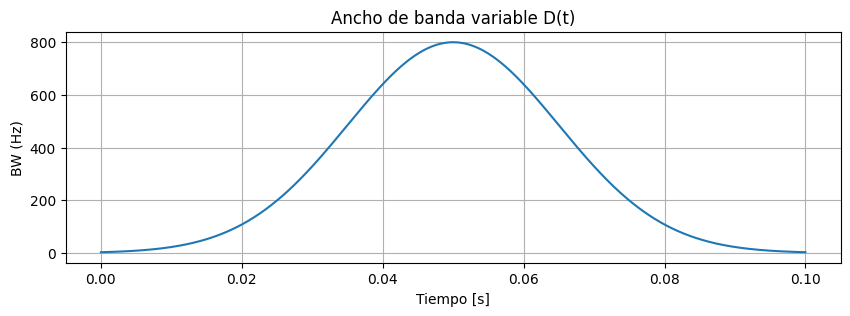

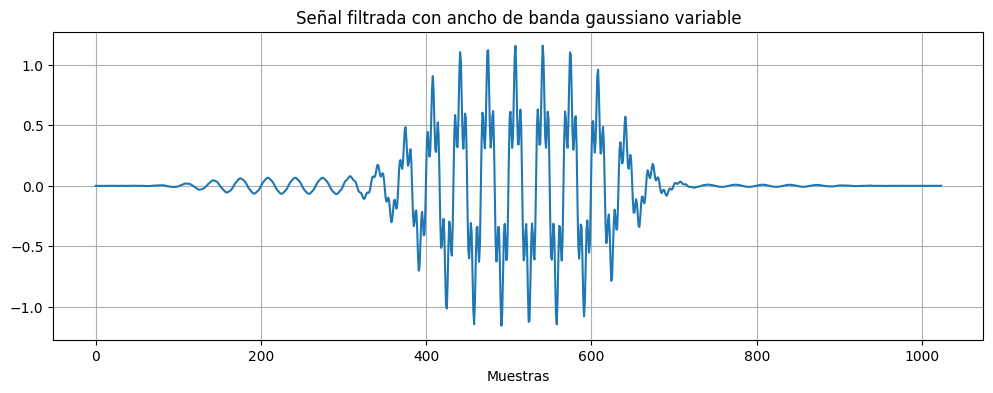

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft, istft

# =======================================================
# Parámetros
# =======================================================
fs = 10000
T = 0.1
t = np.linspace(0, T, int(fs*T))

# Señal de ejemplo: mezcla de dos sinusoides
x = np.sin(2*np.pi*300*t) + 0.5*np.sin(2*np.pi*1500*t)

# =======================================================
# Definir la gaussiana D(t) que controla el ancho de banda
# =======================================================
A = 800          # ancho máximo del filtro en Hz
mu = 0.05        # centro temporal
sigma = 0.015    # dispersión temporal

D_t = A * np.exp(- (t - mu)**2 / (2*sigma**2))

plt.figure(figsize=(10,3))
plt.plot(t, D_t)
plt.title("Ancho de banda variable D(t)")
plt.xlabel("Tiempo [s]")
plt.ylabel("BW (Hz)")
plt.grid()
plt.show()

# =======================================================
# STFT de la señal
# =======================================================
f, tt, Zxx = stft(x, fs, nperseg=512)

# frecuencia central del filtro
fc = 800  # Hz

# Construir filtro H(t,f)
H = np.zeros_like(Zxx, dtype=float)

for i, ti in enumerate(tt):
    D = np.interp(ti, t, D_t)
    H[:, i] = np.exp(-(f - fc)**2 / (2 * D**2))

# Aplicar el filtro
Z_filt = Zxx * H

# Reconstruir la señal
_, x_filt = istft(Z_filt, fs)

# =======================================================
# Graficar señal filtrada
# =======================================================
plt.figure(figsize=(12,4))
plt.plot(x_filt)
plt.title("Señal filtrada con ancho de banda gaussiano variable")
plt.xlabel("Muestras")
plt.grid()
plt.show()
